## Presenting the Calendar! 📅

To explain some of the terminology used in this package, the image below can be used as reference.

The calendar system revolves around so-called "anchor dates" and "anchor years". The **anchor date** is (generally) the start of the period you want to forecast. I.e. your target data. The anchor date is an abstract date, and does not include a year. For example, 5 June, or 25 December 🎄.

**Anchor years** are used to create a full date with the anchor date (e.g., 25 December 2022), and to group the calendar intervals together.

Two types of intervals exist. First are the **target intervals**, which is generally what you want to predict or forecast. The other type are **precursor intervals**, intervals preceding the anchor date representing the data that you would like to use to forecast the target interval.

![Calendar Illustration](../notebooks/calendar_drawing.PNG)

### Using the calendar
First we import the package, and create an empty calendar with the anchor date 25 December:

In [1]:
import s2spy.time
cal = s2spy.time.Calendar("12-25")  # 🎄🎅
cal

Calendar(
    anchor='12-25',
    allow_overlap=False,
    mapping=None,
    intervals=None
)

To this calendar we can add an interval, in this case a "target" interval which we want to use as our target data:

In [2]:
cal.add_interval("target", length="1d")

When viewing the calendar, you can see that the calendar now contains this interval

In [3]:
cal

Calendar(
    anchor='12-25',
    allow_overlap=False,
    mapping=None,
    intervals=[
        Interval(role='target', length='1d', gap='0d')
    ]
)

However, this calendar is not mapped to any years yet. Before we can view which dates are represented by each interval, we have to map the calendar:

In [4]:
cal.map_years(start=2021, end=2022)

Calendar(
    anchor='12-25',
    allow_overlap=False,
    mapping=('years', 2021, 2022),
    intervals=[
        Interval(role='target', length='1d', gap='0d')
    ]
)

Now we can call `.show()` and view the intervals generated. A table is returned, showing the anchor year(s) on the vertical axis and the intervals on the horizontal index, sorted by their interval index (`i_interval`).

In [5]:
cal.show()

i_interval,1
anchor_year,
2022,"[2022-12-25, 2022-12-26)"
2021,"[2021-12-25, 2021-12-26)"


We can add some precursor periods, and inspect the table again. Note that the target interval has a positive index, while the precursors have negative indices.

In [6]:
for _ in range(6):
    cal.add_interval("precursor", length="1d")
cal.show()

i_interval,-6,-5,-4,-3,-2,-1,1
anchor_year,,,,,,,
2022,"[2022-12-19, 2022-12-20)","[2022-12-20, 2022-12-21)","[2022-12-21, 2022-12-22)","[2022-12-22, 2022-12-23)","[2022-12-23, 2022-12-24)","[2022-12-24, 2022-12-25)","[2022-12-25, 2022-12-26)"
2021,"[2021-12-19, 2021-12-20)","[2021-12-20, 2021-12-21)","[2021-12-21, 2021-12-22)","[2021-12-22, 2021-12-23)","[2021-12-23, 2021-12-24)","[2021-12-24, 2021-12-25)","[2021-12-25, 2021-12-26)"


Besides a table view, the calendar can also be visualized in a plot

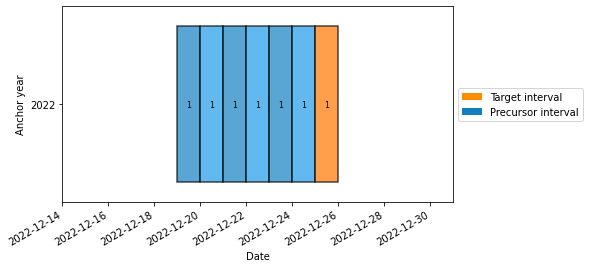

In [7]:
cal.visualize(n_years=1, add_legend=True, show_length=True)

import matplotlib.pyplot as plt; fig = plt.gcf(); fig.autofmt_xdate()

For inputs such as `length`, you can use either days (`"10d"`), weeks (`"3W"`) or months (`"1M"`).

In [8]:
for _ in  range(2):
    cal.add_interval("precursor", length="1M")

Note that in the visualization below, the length of the large precursor blocks is 31 and 30 days respectively, this is due to the input length of `1M`, and the months not having the same lengths

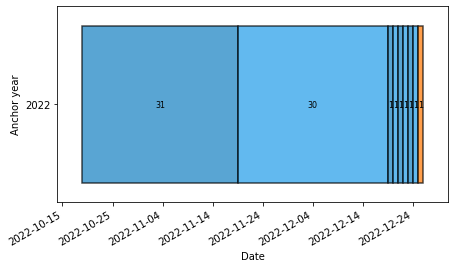

In [9]:
cal.visualize(n_years=1, add_legend=False, show_length=True)
fig = plt.gcf(); fig.autofmt_xdate()

Last but not least, are gaps. Gaps can be inserted between the previous interval and the new one:

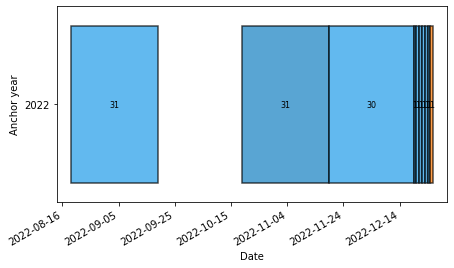

In [10]:
cal.add_interval("precursor", length="1M", gap="1M")
cal.visualize(n_years=1, add_legend=False, show_length=True)
fig = plt.gcf(); fig.autofmt_xdate()

### Using the "repr" to reproduce calendars 📜
When you just call the calendar, as in the cell below, the calendar will return a string **repr**esentation of itself. This is enough information to completely rebuild the calendar, so it can be used as a way to store or share a specific calendar.

In [11]:
cal = s2spy.time.Calendar("06-01") 
cal.map_years(2020, 2022)
cal.add_interval("target", "1d")
cal.add_interval("precursor", "7d", "1M")
cal

Calendar(
    anchor='06-01',
    allow_overlap=False,
    mapping=('years', 2020, 2022),
    intervals=[
        Interval(role='target', length='1d', gap='0d'),
        Interval(role='precursor', length='7d', gap='1M')
    ]
)

Here we copy-paste the calendar, and we import the required classes from `s2spy.time`. Note that it reproduces itself when you call `cal`

In [12]:
from s2spy.time import Calendar, Interval
Calendar(
    anchor='06-01',
    allow_overlap=False,
    mapping=('years', 2020, 2022),
    intervals=[
        Interval(role='target', length='1d', gap='0d'),
        Interval(role='precursor', length='7d', gap='1M')
    ]
)
cal

Calendar(
    anchor='06-01',
    allow_overlap=False,
    mapping=('years', 2020, 2022),
    intervals=[
        Interval(role='target', length='1d', gap='0d'),
        Interval(role='precursor', length='7d', gap='1M')
    ]
)

### The `Interval` building block 🧱

The basic building block of the Calendar is the **Interval**. Intervals have three properties: the type (target or precursor), the length, and the gap. The gap is defined as the gap between this interval and the preceding interval of the same type (or the anchor, if this interval is the first one).

In [13]:
iv = Interval("target", length="5d", gap="1M")
iv

Interval(role='target', length='5d', gap='1M')

Intervals can be changed in-place. Their gap and length can be set in the following way:

In [14]:
iv.gap = "5d"
iv

Interval(role='target', length='5d', gap='5d')

### All about anchors ⚓

As said before, the anchor date is one of the basic elements of the calendar. Up to now we have just showcased setting the anchor as a date ("MM-DD"), however, there are some alternative options.

If you are interested in *only* months, it is possible to create a calendar revolving solely around calendar months. The anchor can be defined as an *English* month name (e.g., "January" or the short name "Jan"). This is equivalent to setting the anchor to the first day of that month. For example:

In [19]:
cal = Calendar(anchor="December")  # [December 01)
cal.add_interval("target", "1M")
for _ in range(11):
    cal.add_interval("precursor", "1M")
cal.map_years(2022, 2022)
cal.show()

i_interval,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,1
anchor_year,,,,,,,,,,,,
2022,"[2022-01-01, 2022-02-01)","[2022-02-01, 2022-03-01)","[2022-03-01, 2022-04-01)","[2022-04-01, 2022-05-01)","[2022-05-01, 2022-06-01)","[2022-06-01, 2022-07-01)","[2022-07-01, 2022-08-01)","[2022-08-01, 2022-09-01)","[2022-09-01, 2022-10-01)","[2022-10-01, 2022-11-01)","[2022-11-01, 2022-12-01)","[2022-12-01, 2023-01-01)"


Besides months, the calendar can also be used with **week numbers**. You can use either only a week number ("W10" for the 10th week of a year), or the combination of a week number and the day of the week (where Monday is 1 and Sunday 7). This can be especially useful with targets and precursor intervals that you would like to cover certain days of the week. For example:

In [20]:
Calendar(anchor="W12")  # Week 12
cal = Calendar(anchor="W12-5")  # Friday on week 12
cal.add_interval("target", "1d")
cal.add_interval("precursor", "1d", gap="1W")
cal.map_years(2018, 2022)
cal.show()

i_interval,-1,1
anchor_year,,
2022,"[2022-03-17, 2022-03-18)","[2022-03-25, 2022-03-26)"
2021,"[2021-03-18, 2021-03-19)","[2021-03-26, 2021-03-27)"
2020,"[2020-03-19, 2020-03-20)","[2020-03-27, 2020-03-28)"
2019,"[2019-03-21, 2019-03-22)","[2019-03-29, 2019-03-30)"
2018,"[2018-03-15, 2018-03-16)","[2018-03-23, 2018-03-24)"


### Modifying calendars in-place 🏗️
If you want to to *funkier* things with the calendar, you can edit already existing calendars 👷‍♀️

For example, the anchor of the calendar can be changed:

In [15]:
cal.anchor = "01-01"  # 🍾🥂
cal

Calendar(
    anchor='01-01',
    allow_overlap=False,
    mapping=('years', 2020, 2022),
    intervals=[
        Interval(role='target', length='1d', gap='0d'),
        Interval(role='precursor', length='7d', gap='1M')
    ]
)

In this case, you do need to be careful when comparing two calendars, as data might have shifted to a different anchor year.

Modifying the intervals is also possible. The precursors and target intervals are stored in lists, and can be changed in-place:

In [16]:
cal.precursors  # or cal.targets

[Interval(role='precursor', length='7d', gap='1M')]

Now let's change the gaps and lengths (for sake of demonstration):

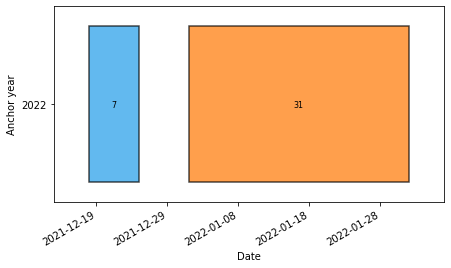

In [17]:
for precursor in cal.precursors:
    precursor.gap = "7d"

for target in cal.targets:
    target.length="1M"

cal.map_years(2022, 2022)
cal.visualize(add_legend=False, show_length=True)
fig = plt.gcf(); fig.autofmt_xdate()

A more useful trick can be modifying the `gap` property of only the *first* target and precursor intervals. This allows you to shift all intervals relative to the anchor date:

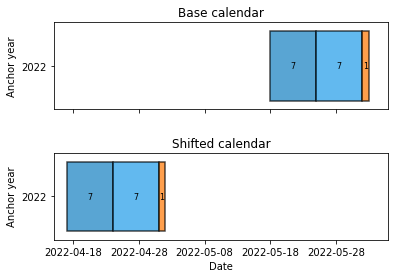

In [36]:
cal = Calendar(
    anchor='06-01',
    allow_overlap=False,
    mapping=('years', 2020, 2022),
    intervals=[
        Interval(role='target', length='1d', gap='0d'),
        Interval(role='precursor', length='7d', gap='0d'),
        Interval(role='precursor', length='7d', gap='0d')
    ]
)

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
cal.visualize(n_years=1, add_legend=False, show_length=True, ax=ax1)
ax1.set_title("Base calendar")

# Shift the calendar by a month
cal.precursors[0].gap = "1M"
cal.targets[0].gap = "-1M"

cal.visualize(n_years=1, add_legend=False, show_length=True, ax=ax2)
ax2.set_title("Shifted calendar")

import numpy as np
ax2.set_xlim((np.datetime64("2022-04-15"), np.datetime64("2022-06-05")))
ax1.set_xlabel("")
fig.subplots_adjust(hspace=0.5)